# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_01_002
## Амплітудні перетворення

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 8

In [2]:
## Завантаження файлу зображення
path = './IMAGES/' 
filename = 'Lenna.png' 
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)
i = 43
j = 53
print ('PIXEL ', i,j, 'COLORS R = ', test_im[i,j,0], ' G = ', test_im[i,j,1], ' B = ',test_im[i,j,2],)

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256
PIXEL  43 53 COLORS R =  232  G =  137  B =  109


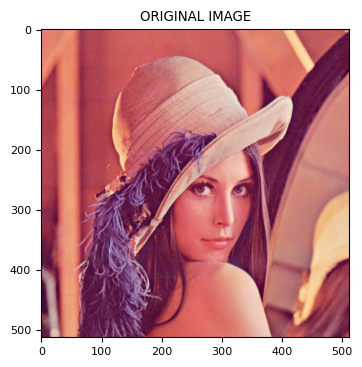

In [3]:
## Вивід оррігінального зображення на екран
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

In [4]:
## Визначення напівтоновоного  зображення
image_gray = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
print ('GRAY SHAPE', image_gray.shape, 'GRAY SIZE', image_gray.size)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        image_gray [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]

GRAY SHAPE (512, 512, 3) GRAY SIZE 786432


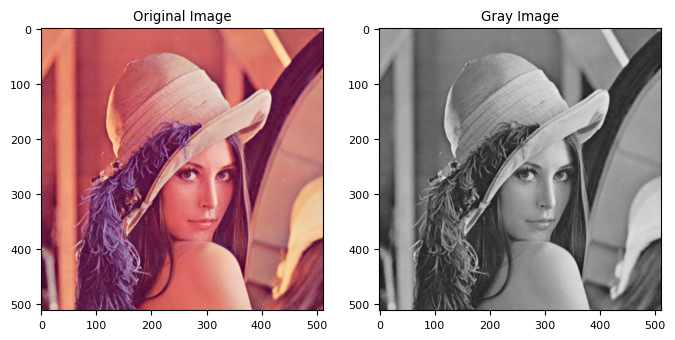

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title("Original Image")
ax[0].imshow(test_im)
ax[1].set_title("Gray Image")
ax[1].imshow(image_gray)
plt.show()

####  1. Бінарізація ахроматичного зображення


In [10]:
image_bin = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)

bin_level  = 128  # Поріг бінарізації

for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        if image_gray [i, j, 0 ] > bin_level :
             image_bin [i, j, : ] = [255,255, 255]

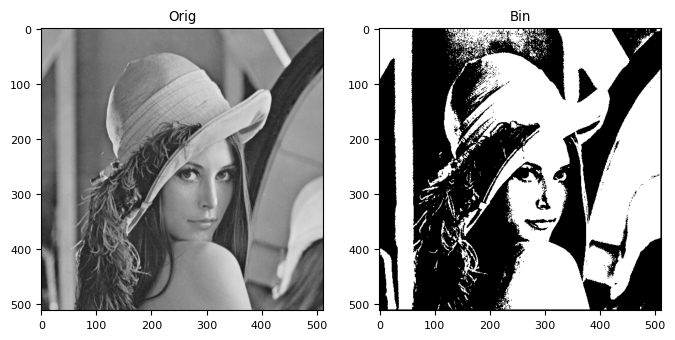

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Orig")
ax[1].imshow(image_bin)
ax[1].set_title("Bin")
plt.show()

####  2. Зріз яскравості

In [12]:
image_bin = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)

bin_L  = 100
bin_H  = 200

for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        if image_gray [i, j, 0 ] > bin_L and image_gray [i, j, 0 ] < bin_H:
             image_bin [i, j, : ] = [255,255,255]

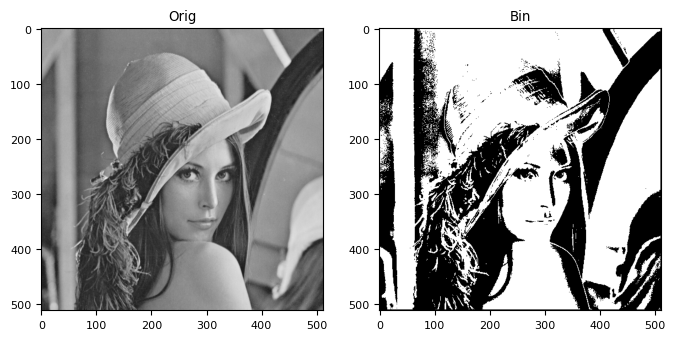

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Orig")
ax[1].imshow(image_bin)
ax[1].set_title("Bin")
plt.show()

#### 3. Негативне зображення

In [15]:
image_neg = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
L_max  = 255
for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        image_neg [i, j, : ] = L_max - image_gray [i, j, 0 ]
        

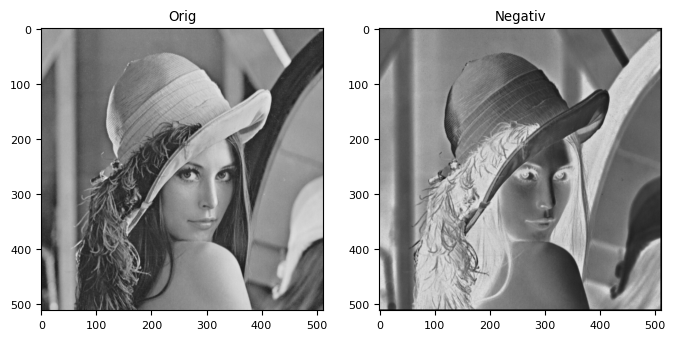

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Orig")
ax[1].imshow(image_neg)
ax[1].set_title("Negativ")
plt.show()

####  4. Приблизно логаріфм

In [18]:
image_enh = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
L_in_point  = 64
L_out_point  = 192
for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        if image_gray [i, j, 0 ] < 64 :
            image_enh[i, j, : ] = image_gray [i, j, 0 ]*3
        else:
            image_enh[i, j, : ] = 192 + np.uint8((image_gray [i, j, 0 ]-64) / 3)

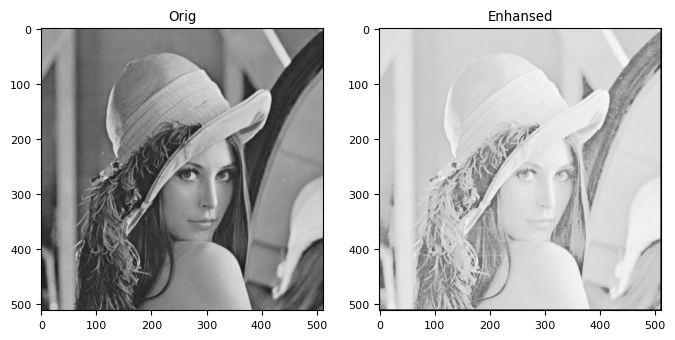

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Orig")
ax[1].imshow(image_enh)
ax[1].set_title("Enhansed")
plt.show()

####  5. Бітова площина

In [20]:
image_bin = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)

bit_slice = 7 # Позиція бітової площини (разряд)
bit_slice_ = 6 # Позиція бітової площини (разряд)
bit_slice__ = 5 # Позиція бітової площини (разряд)
#code_slice = np.uint8(2**bit_slice+2**bit_slice_+2**bit_slice__+16+8) # Код маски
code_slice = 128  # Код маски
print ('БІТ', bit_slice_, 'КОД', code_slice )

for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        image_bin [i, j, : ] = (image_gray [i, j, 0 ] & code_slice)    
        

БІТ 6 КОД 128


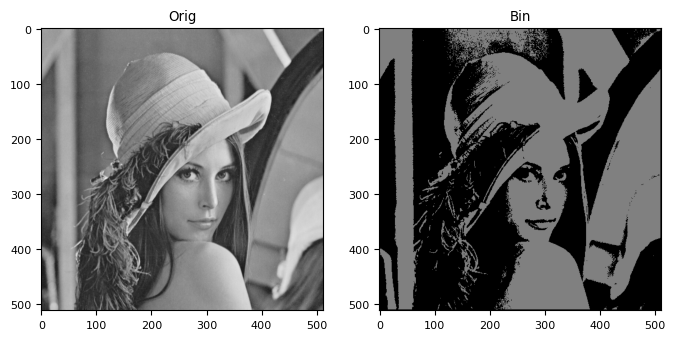

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(image_gray)
ax[0].set_title("Orig")
ax[1].imshow(image_bin)
ax[1].set_title("Bin")
plt.show()


In [22]:
## Бінарізація слайсу
image_fine = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        if image_bin [i, j, 0 ] == code_slice :
            image_fine [i, j, : ] = [255, 255, 255] 


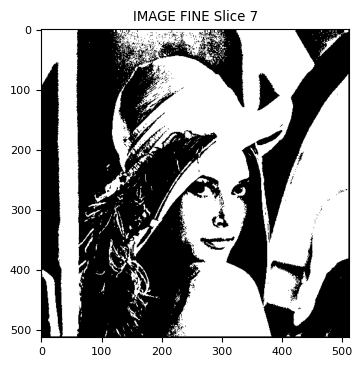

In [23]:
## Вивід перетвореного зображення на екран
plt.figure(figsize=(4, 4))
plt.title('IMAGE FINE Slice '+ str(bit_slice))
plt.imshow(image_fine)
plt.show()        


#### 6. Кольоровий негатив

In [24]:
image_neg_color = np.zeros ((rows_num , clms_num,3), dtype=np.uint8)
L_max  = 255
for i in  range (0, rows_num-1, 1):
    for j in  range (0, clms_num-1, 1):
        image_neg_color [i, j, 0 ] = L_max - test_im [i, j, 0]
        image_neg_color [i, j, 1 ] = L_max - test_im [i, j, 1]
        image_neg_color [i, j, 2 ] = L_max - test_im [i, j, 2]
        

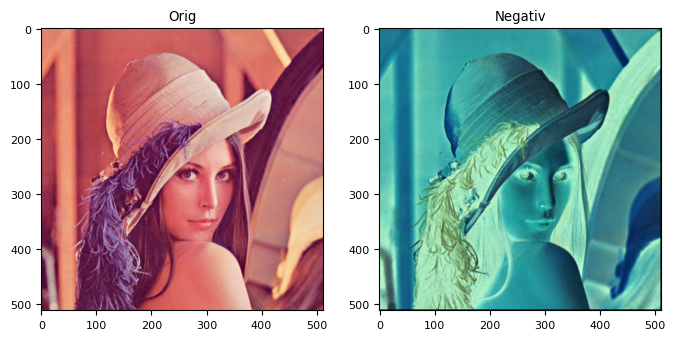

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))## ЗАДАЕМ РАЗМЕР ВЫВОДИМОЙ ФИГУРЫ
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Orig")
ax[1].imshow(image_neg_color)
ax[1].set_title("Negativ")
plt.show()